In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime, timezone

from analysis_functions import *

# Plot histogram

Mean Latency = 21.545221543164324 ms
Root Mean Square Latency = 33.0348450125166 ms
Latency Standard Deviation = 25.042052904204173 ms


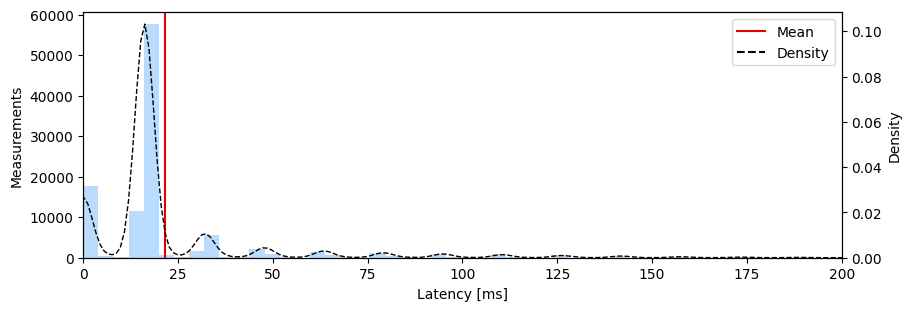

In [2]:
data_file = "benchmarking_results.csv"
max_latency_threshold = 200 # [ms]
num_histogram_bins = 50     # [-]

# Create numpy array for latency in milliseconds
pd_data = pd.read_csv(data_file) * 1000


benchmarkHistogram(pd_data, num_histogram_bins, (9, 3), max_latency_threshold)


# Find outliers
Find clusters when the latencies exceed a given threshold in milliseconds.

In [9]:
percentage_exceeding, clusters, cluster_times = findClustersOverThreshold(
    pd_data['latency_seconds'].values, 
    pd_data['send_time'].values,
    max_latency_threshold)

# Call the same function, with inverted values to find the longest gap *between* outliers.
_, clusters_not_exceeding, _ = findClustersOverThreshold(
    - pd_data['latency_seconds'].values, 
    - pd_data['send_time'].values,
    - max_latency_threshold)

print(f"Percentage of values exceeding the latency threshold: {percentage_exceeding:.3f}%")
print(f"Number of event clusters when exceeding the threshold: {len(clusters)}")
print(f"Longest cluster of packets exceeding threshold: {len(max(clusters, key=len))} consecutive packages")
print(f"Longest gap of packets between clusters of outliers: {len(max(clusters_not_exceeding, key=len))} consecutive packages")

# Prints details for each cluster 
# print("Clusters of exceeding values:")
# for i, cluster in enumerate(clusters):
#     print(f'{datetime.utcfromtimestamp(float(cluster_times[i])/1000).replace(tzinfo=timezone.utc).strftime("%H:%M:%S")}: {cluster} ms')


Percentage of values exceeding the latency threshold: 1.194%
Number of event clusters when exceeding the threshold: 216
Longest cluster of packets exceeding threshold: 70 consecutive packages
Longest gap of packets between clusters of outliers: 1966 consecutive packages
